# Manual trading round 3: Floppers bidding

a) First bid: against the machine

$$ \displaystyle
x = reserve \\
\mathbb{E}[\text{Profit}(x)] = \int_{\mathbb{R}}\text{Profit(x)}\cdot \text{f(x)}dx = \int_{\mathbb{R}}(320-b)\cdot u(b-x)f(x)dx=\\ \\
= \int_{160}^{200}\frac{1}{110}(320-b)u(b-x)dx + \int_{250}^{320}\frac{1}{110}(320-b)u(b-x)dx \\=\frac{320-b}{110}[\int_{160}^{200}u(b-x)dx + \int_{250}^{320}u(b-x)dx] \\

$$



Caso 1:  $b\geq 250$
$$
\mathbb{E}[\text{Profit}(x)]  = \frac{320-b}{110}[\int_{160}^{200}u(b-x)dx + \int_{250}^{b}u(b-x)dx] = \\
= \frac{320-b}{110}[40+ b-250] = \frac{320-b}{110}[b-210]

$$

Now we maximize the profit's expected value in terms of b:

$$
\frac{\partial \mathbb{E}[\text{Profit}(x)]}{\partial{b}} = \frac{265-b}{55} = 0\Leftrightarrow b = 265 
$$

We can easily see that it is a local maximum

Caso 2: $b\leq 200$
$$
\mathbb{E}[\text{Profit}(x)]  =\frac{320-b}{110}[\int_{160}^{b}u(b-x)dx + \cancel{\int_{250}^{320}u(b-x)dx}] =\\
= \frac{320-b}{110}[b-160]
$$

Now we maximize the profit's expected value in terms of b:

$$
\frac{\partial \mathbb{E}[\text{Profit}(x)]}{\partial{b}} = \frac{240-b}{55} = 0\Leftrightarrow b = 240 
$$


Which is out of scope. Hence, we will take the absolut maximum of the interval, which is $b=200$.

Now we have just got to compare the expected value of both maximums to decide our bid:

$$
\mathbb{E}[\text{Profit}](b=265) = \frac{55}{2}  \\
\mathbb{E}[\text{Profit}](b=200) \approx 43.63
$$



Solution is 200

b) First bid: against the people

First we calculate what the optimal bid every player should place is:

$$ 
x = reserve, \quad x\geq250 \\
\mathbb{E}[\text{Profit}(x)] = \int_{250}^{\infty}\text{Profit(x)}\cdot \text{f(x)}dx = \\=\frac{320-b}{70}\int_{250}^{b}1dx = \frac{320-b}{70}(b-250) \\

$$


We now maximize it:

$$
\frac{\partial \mathbb{E}[\text{Profit}(x)]}{\partial{b}} = \frac{57}{7}-\frac{b}{35} = 0\Leftrightarrow b = 285
$$

Which is the maximum value in the interval $[250,320]$. 

However, we belive players will probably stablish quite a more agressive strategy, hence, making the average price be above 285. For that reason, we will obtain the most resilient value of the bid when average value is $b+\delta$, with $\delta$ taking values up to 4 units (which means a profit discount of approximately 11% over the optimal play).

In [132]:
import numpy as np  ## Modify the values of the meshgrid to see how the optimal value changes !!!!!!
delta = np.linspace(0,9,9)
b = np.linspace(285,295,9)

We will know calculate what is the most resilient value of $b\in[285,290]$ across all the values of delta. 

For values of $b_2$ over the average price, the adjusted profit is:

$$
\mathbb{E}[\text{Profit}(x)] = \frac{b_2-250}{70}\frac{(320- \text{average price})^3}{(320- b_2)^2}
$$

And otherwise the expected profit is:

$$
\mathbb{E}[\text{Profit}(x)] = \frac{320-b_2}{70}(b_2-250)
$$

In [133]:
# Create the meshgrid
B, D = np.meshgrid(b, delta)
Z = np.where(B < 285+D, (B-250)/70*(320-(285+D))**3/(320-B)**2, (320-B)/70*(B-250))

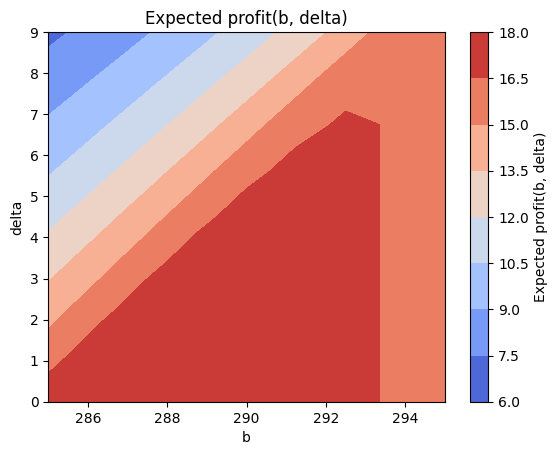

In [134]:
import matplotlib.pyplot as plt

plt.contourf(B, D, Z, cmap='coolwarm')
plt.colorbar(label='Expected profit(b, delta)')
plt.xlabel('b')
plt.ylabel('delta')
plt.title('Expected profit(b, delta)')
plt.show()


In [ ]:
Z_mean = np.mean(Z, axis=0)  
Z_delta0 = Z[0, :]  
Z_ultimo_delta = Z[-1, :]
plt.scatter(b,Z_mean, color = 'black', label = 'EP across delta')
plt.scatter(b,Z_delta0, color = 'blue', label = 'EP for delta = 0')
plt.scatter(b,Z_ultimo_delta , color = 'red', label = 'EP for max delta')
plt.xlabel('b')
plt.legend()
plt.ylabel('Expected profit')

Text(0, 0.5, 'Expected profit')

Text(0.5, 0, 'bid')

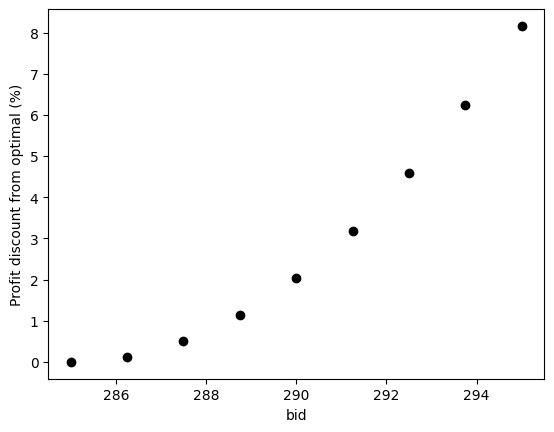

In [ ]:
Z_loss = abs((1-Z_delta0/Z_delta0[0])*100)
plt.scatter(b,Z_loss,color = 'black')
plt.ylabel('Profit discount from optimal (%)')
plt.xlabel('bid')

Wee see the optimal value significantly varies when the values of the grid are modified, but the difference in profit margin does not. Hence, being conservative when choosing the bid is highly incentived. If we chose a second bid of 295, we would be missing +8% profit from the optimal solution (285).